In [14]:
import geopandas
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [15]:
request = requests.get('https://r2.datahub.io/clvyjaryy0000la0cxieg4o8o/main/raw/data/countries.geojson')

In [16]:
gdf = geopandas.read_file(request.content)

In [17]:
egov = pd.read_csv('EGOV_DATA_2024.csv')

In [18]:
egov = egov.sort_values(by='Country Name', ascending=True).reset_index(drop=True)

In [19]:
paises = egov['Country Name'].unique().tolist()

In [20]:
nomes_paises = {
    'The Bahamas': 'Bahamas',
    'Brunei': 'Brunei Darussalam',
    'Republic of the Congo': 'Congo',
    'Czechia': 'Czech Republic',
    'Syria': 'Syrian Arab Republic',
    'eSwatini': 'Eswatini',
    'Turkey': 'Türkiye',
    'Russia': 'Russian Federation',
    'Federated States of Micronesia': 'Micronesia (Federated States of)',
    'North Korea': "Democratic People's Republic of Korea",
    'Georgia': 'Georgia (Country)',
    'South Korea': 'Republic of Korea',
    'Moldova': 'Republic of Moldova',
    'East Timor': 'Timor-Leste',
    'Vietnam': 'Viet Nam',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
    'Republic of Serbia': 'Serbia',
    'Laos': "Lao People's Democratic Republic",
    'Iran': 'Iran (Islamic Republic of)',
    'Ivory Coast': "Côte d'Ivoire",
    "São Tomé and Principe": 'Sao Tome and Principe'
}

In [21]:
gdf['name'] = gdf['name'].replace(nomes_paises)

In [22]:
gdf = gdf.iloc[:, [0, 3]]

In [23]:
gdf = gdf[gdf['name'].isin(paises)].sort_values(by='name', ascending=True).reset_index(drop=True)

In [24]:
df = gdf.copy()

In [25]:
df['EGDI'] = egov['E-Government Index']

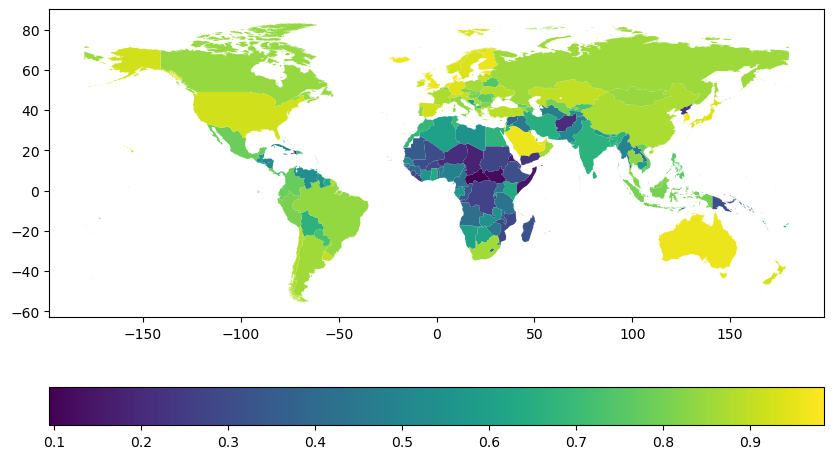

In [26]:
df.plot(column='EGDI',
        cmap='viridis',
        legend=True,
        legend_kwds={
            'orientation': "horizontal"
        },
        figsize=(10, 6)
)

plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/mapa_coropleto_paises_egdi.png', dpi=300, bbox_inches='tight')
plt.show()